In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import cv2
import numpy as np

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
image_path = '/content/drive/MyDrive/OpenCV/img1.png'

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
small_img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)

In [3]:
# Zoom in on image using built-in function
opencv_upscaled = cv2.resize(small_img, (256, 256), interpolation=cv2.INTER_LINEAR)

In [4]:
# Zoom in image with custom function
def custom_linear_interpolation(image, new_width, new_height):
    src_h, src_w, c = image.shape
    dst = np.zeros((new_height, new_width, c), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = j * (src_w - 1) / (new_width - 1)
            y = i * (src_h - 1) / (new_height - 1)

            x0 = int(np.floor(x))
            x1 = min(x0 + 1, src_w - 1)
            y0 = int(np.floor(y))
            y1 = min(y0 + 1, src_h - 1)

            dx = x - x0
            dy = y - y0

            for k in range(c):
                top = (1 - dx) * image[y0, x0, k] + dx * image[y0, x1, k]
                bottom = (1 - dx) * image[y1, x0, k] + dx * image[y1, x1, k]
                value = (1 - dy) * top + dy * bottom
                dst[i, j, k] = np.clip(value, 0, 255)

    return dst

custom_upscaled = custom_linear_interpolation(small_img, 256, 256)

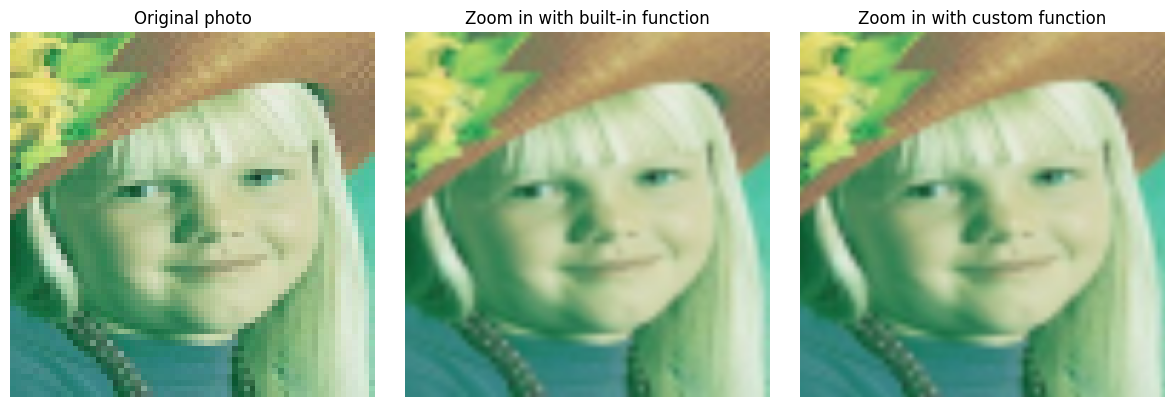

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(small_img)
plt.title("Original photo")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(opencv_upscaled)
plt.title("Zoom in with built-in function")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(custom_upscaled)
plt.title("Zoom in with custom function")
plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float64) - img2.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

resized_img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_LINEAR)

print("PSNR OpenCV:", psnr(opencv_upscaled, resized_img))
print("PSNR Custom:", psnr(custom_upscaled, resized_img))

PSNR OpenCV: 26.201067752024798
PSNR Custom: 25.101666334730368
